<a href="https://colab.research.google.com/github/GabrielSatrioD/Skripsi/blob/main/Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Load dataset
file_path = '/content/drive/MyDrive/DokumenSkripsi/variabel.xlsx'
df = pd.read_excel(file_path)

# Cek 5 baris awal
df.head()

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok
0,74.0,LAKI-LAKI,150,80,26.562500,TIDAK,TIDAK
1,25.0,LAKI-LAKI,120,74,21.453574,TIDAK,TIDAK
2,56.0,LAKI-LAKI,97,75,20.449137,TIDAK,TIDAK
3,29.0,PEREMPUAN,120,80,24.447279,TIDAK,TIDAK
4,25.0,LAKI-LAKI,123,85,23.634033,YA,TIDAK


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211271 entries, 0 to 211270
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     211269 non-null  float64
 1   Gender                  211271 non-null  object 
 2   Sistol                  211271 non-null  int64  
 3   Diastol                 211271 non-null  int64  
 4   IMT                     210851 non-null  float64
 5   Kurang Aktifitas Fisik  211262 non-null  object 
 6   Merokok                 211271 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 11.3+ MB


In [5]:
for each in df.columns:
  print(f"Kolom {each} memiliki objek: ")
  print(df[each].unique())
  print(df[each].value_counts())
  print("=======================================================")

Kolom Age memiliki objek: 
[   74.    25.    56.    29.    51.    21.    62.    24.    43.    50.
    61.    34.    22.    41.    54.    52.    53.    48.    57.    73.
    60.    31.    37.    35.    42.    40.    69.    75.    28.    49.
    45.    47.    58.    39.    30.    55.    38.    59.    46.    66.
    72.    65.    71.    64.    70.    63.    79.    77.    68.    44.
    27.    26.    36.    32.    33.    18.    19.    20.    17.    67.
    23.    84.    76.    16.    81.    80.    78.    83.    82.    90.
    88.    89.    85.    87.    86.    93.    96.    95.    94.    98.
    92.    97.    91.    15.    99.    nan -2986.]
Age
 21.0      5910
 22.0      5797
 25.0      5770
 18.0      5714
 24.0      5304
           ... 
 94.0         7
 97.0         4
 98.0         3
 99.0         1
-2986.0       1
Name: count, Length: 86, dtype: int64
Kolom Gender memiliki objek: 
['LAKI-LAKI' 'PEREMPUAN']
Gender
PEREMPUAN    114397
LAKI-LAKI     96874
Name: count, dtype: int64
Kolom S

In [6]:
mapping = {'TIDAK ' : 'TIDAK'}
kolom_rusak = ['Merokok', 'Kurang Aktifitas Fisik']

for each in kolom_rusak:
  df[each] = df[each].replace(mapping)

In [7]:
df.head()

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok
0,74.0,LAKI-LAKI,150,80,26.562500,TIDAK,TIDAK
1,25.0,LAKI-LAKI,120,74,21.453574,TIDAK,TIDAK
2,56.0,LAKI-LAKI,97,75,20.449137,TIDAK,TIDAK
3,29.0,PEREMPUAN,120,80,24.447279,TIDAK,TIDAK
4,25.0,LAKI-LAKI,123,85,23.634033,YA,TIDAK


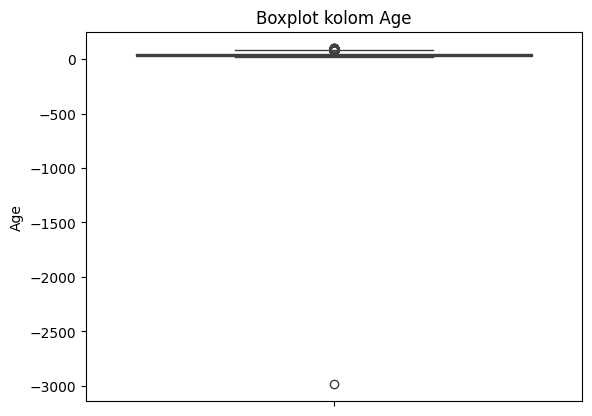

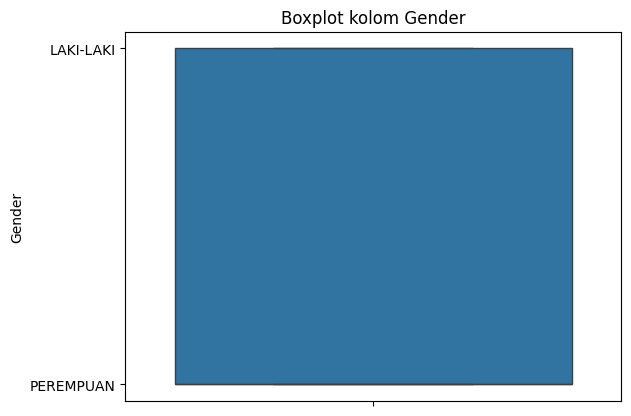

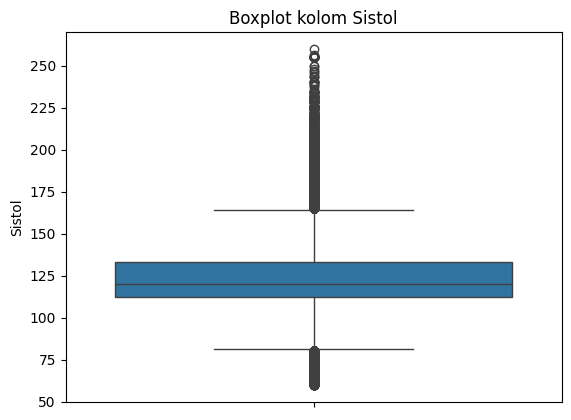

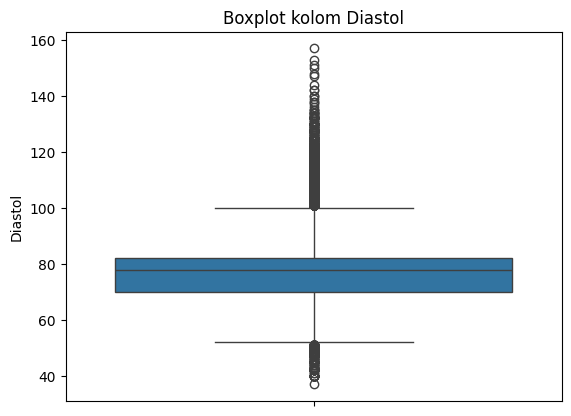

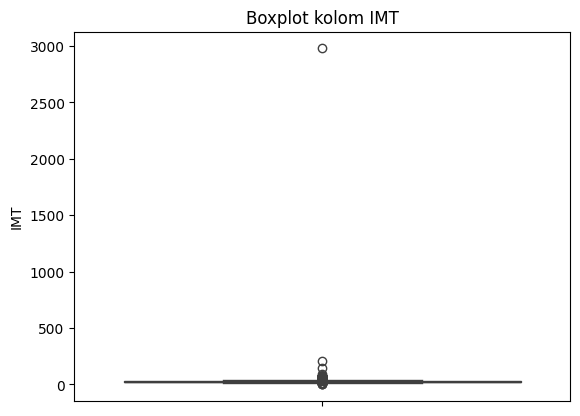

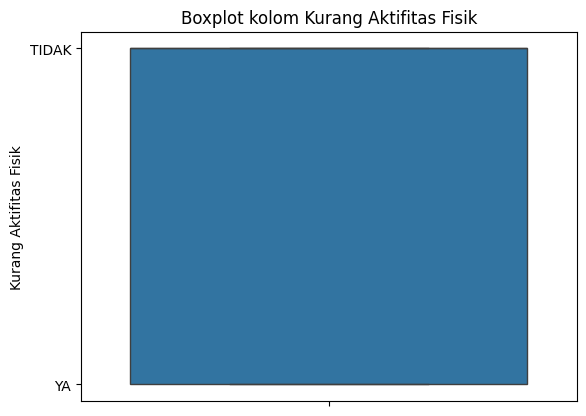

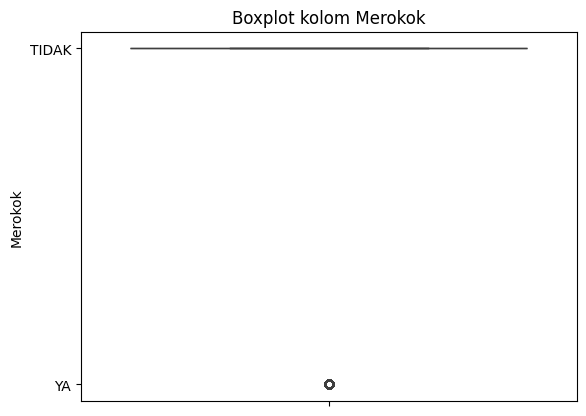

In [8]:
for each in df.columns:
  sns.boxplot(data=df[each])
  plt.title(f"Boxplot kolom {each}")
  plt.show()

In [9]:
df[df['Age'] < 1]

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok
202835,-2986.0,PEREMPUAN,100,66,21.631149,TIDAK,TIDAK


In [10]:
df[df['IMT'] > 45]

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok
34,21.0,PEREMPUAN,120,80,47.872125,TIDAK,TIDAK
871,59.0,PEREMPUAN,188,109,75.877802,TIDAK,TIDAK
1129,25.0,LAKI-LAKI,160,82,45.351474,YA,YA
1321,49.0,PEREMPUAN,170,112,45.488707,YA,TIDAK
1724,40.0,PEREMPUAN,140,90,45.653762,TIDAK,TIDAK
...,...,...,...,...,...,...,...
144519,67.0,LAKI-LAKI,127,95,48.283039,YA,TIDAK
145772,65.0,LAKI-LAKI,140,90,47.665325,YA,TIDAK
203733,64.0,PEREMPUAN,90,60,46.666667,YA,TIDAK
205365,27.0,PEREMPUAN,119,70,46.666667,YA,TIDAK


In [11]:
df.drop(df[df['Age'] < 1].index, inplace=True)
df.drop(df[df['IMT'] > 45].index, inplace=True)
df.drop(df[df['IMT'] < 10].index, inplace=True)

In [12]:
# Cek missing value
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Age                         2
Gender                      0
Sistol                      0
Diastol                     0
IMT                       420
Kurang Aktifitas Fisik      8
Merokok                     0
dtype: int64


In [13]:

median_imt = df['IMT'].median()
df['IMT'].fillna(median_imt, inplace=True)  # Biarkan IMT tetap float

# Imputasi kolom kategorikal pakai modus
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Cek lagi sisa missing value
print("\nJumlah missing value setelah imputasi:")
print(df.isnull().sum())
print(len(df))


Jumlah missing value setelah imputasi:
Age                       2
Gender                    0
Sistol                    0
Diastol                   0
IMT                       0
Kurang Aktifitas Fisik    0
Merokok                   0
dtype: int64
211050


/tmp/ipython-input-13-811139865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IMT'].fillna(median_imt, inplace=True)  # Biarkan IMT tetap float
/tmp/ipython-input-13-811139865.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [14]:
df.dropna(inplace = True)

print(df.isna().sum())
print(f"Banyak data adalah: {len(df)} baris")

Age                       0
Gender                    0
Sistol                    0
Diastol                   0
IMT                       0
Kurang Aktifitas Fisik    0
Merokok                   0
dtype: int64
Banyak data adalah: 211048 baris


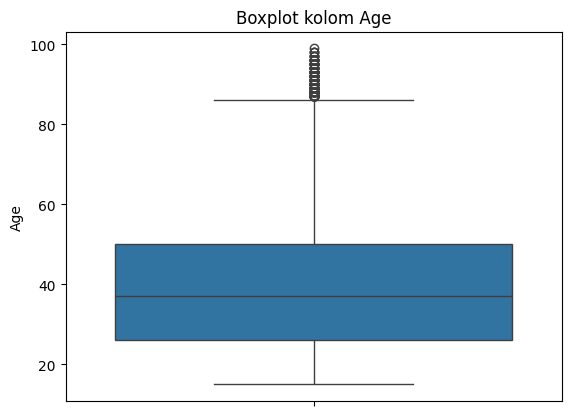

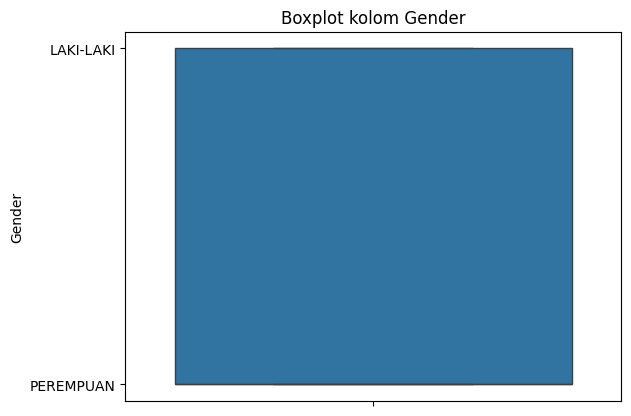

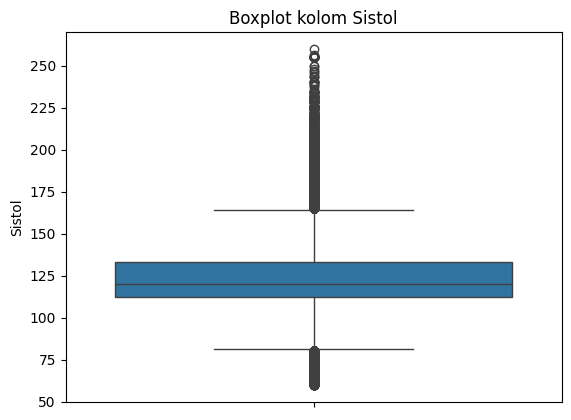

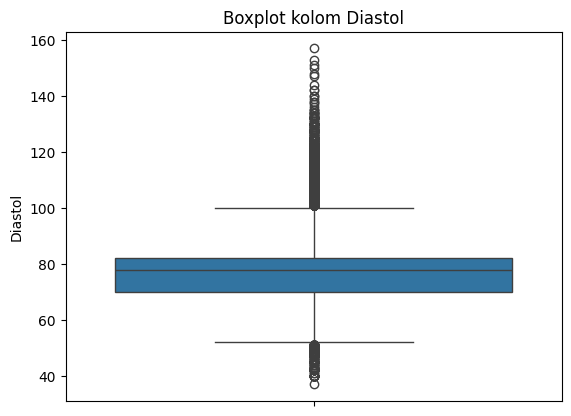

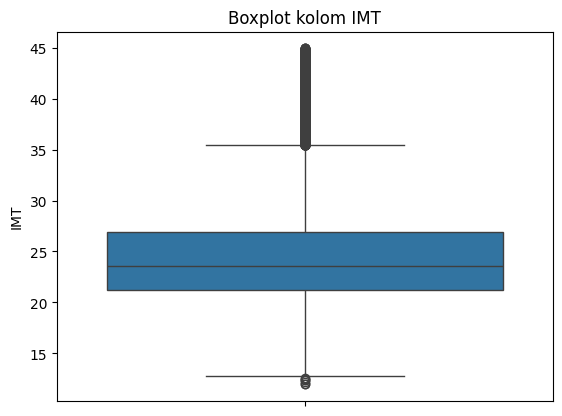

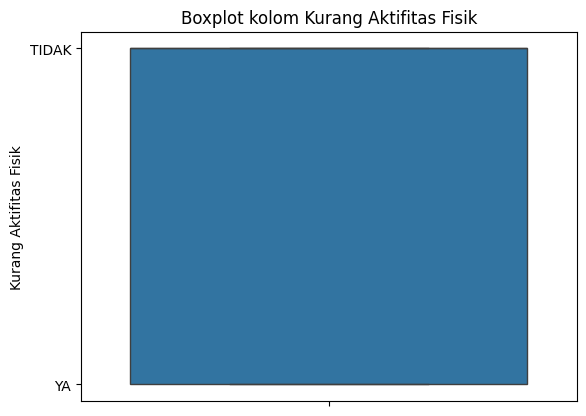

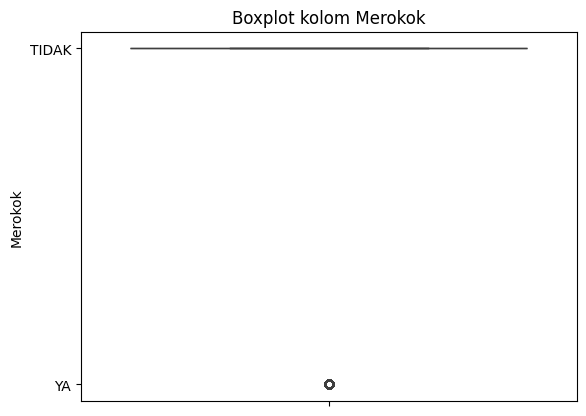

In [15]:
for each in df.columns:
  sns.boxplot(data=df[each])
  plt.title(f"Boxplot kolom {each}")
  plt.show()

--- Histogram untuk Kolom Numerik (Setiap Diagram Terpisah) ---

======== Diagram untuk Kolom: Age ========


/tmp/ipython-input-16-2527583000.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=20, palette='viridis')


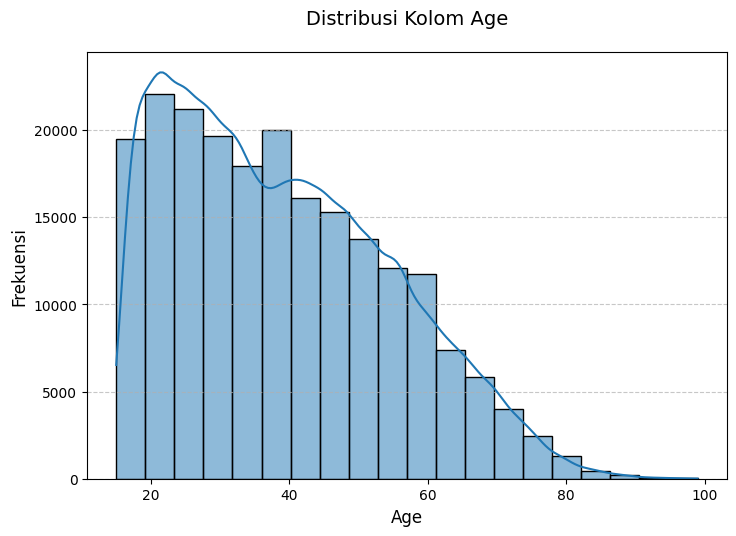


======== Diagram untuk Kolom: Sistol ========


/tmp/ipython-input-16-2527583000.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=20, palette='viridis')


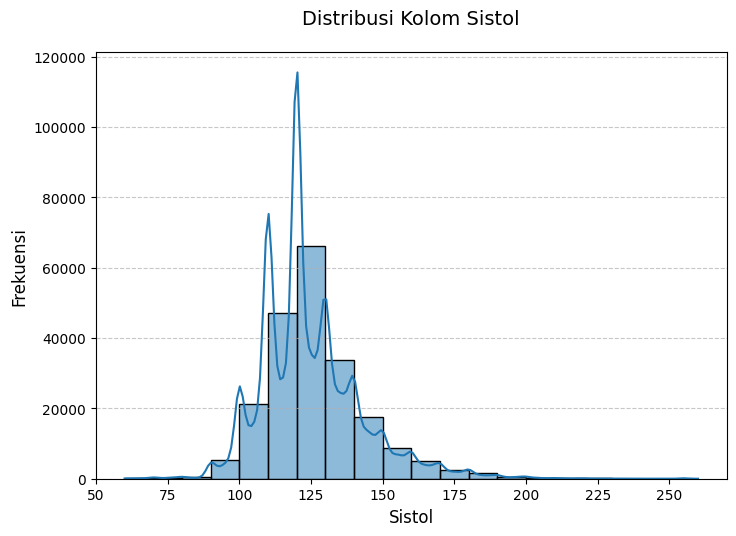


======== Diagram untuk Kolom: Diastol ========


/tmp/ipython-input-16-2527583000.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=20, palette='viridis')


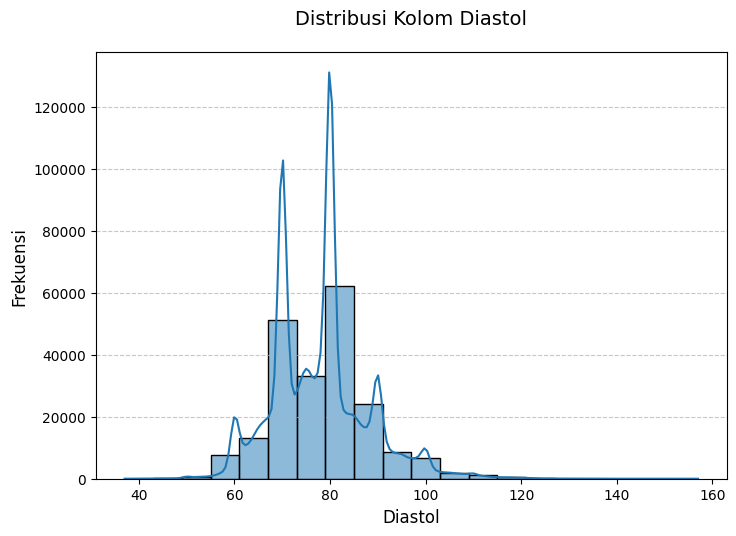


======== Diagram untuk Kolom: IMT ========


/tmp/ipython-input-16-2527583000.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=20, palette='viridis')


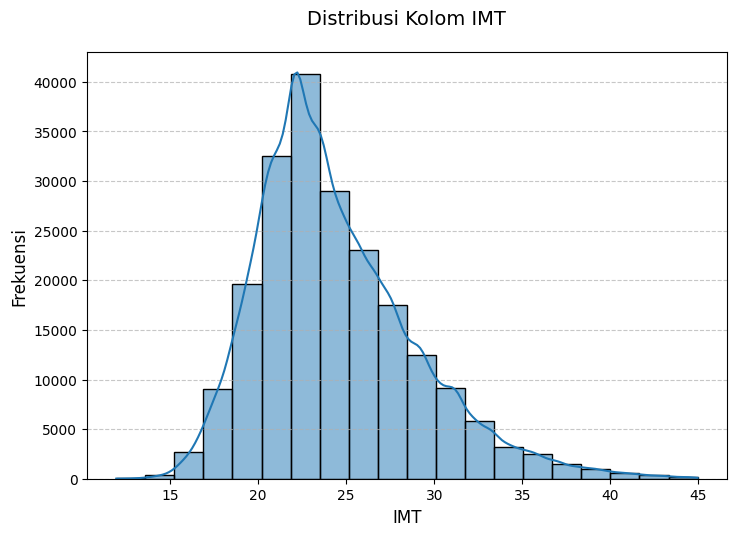


--- Diagram Pie untuk Kolom Kategorikal (Menampilkan Jumlah & Persentase - Setiap Diagram Terpisah) ---

======== Diagram untuk Kolom: Gender ========


/tmp/ipython-input-16-2527583000.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', len(category_counts))(np.arange(len(category_counts)))


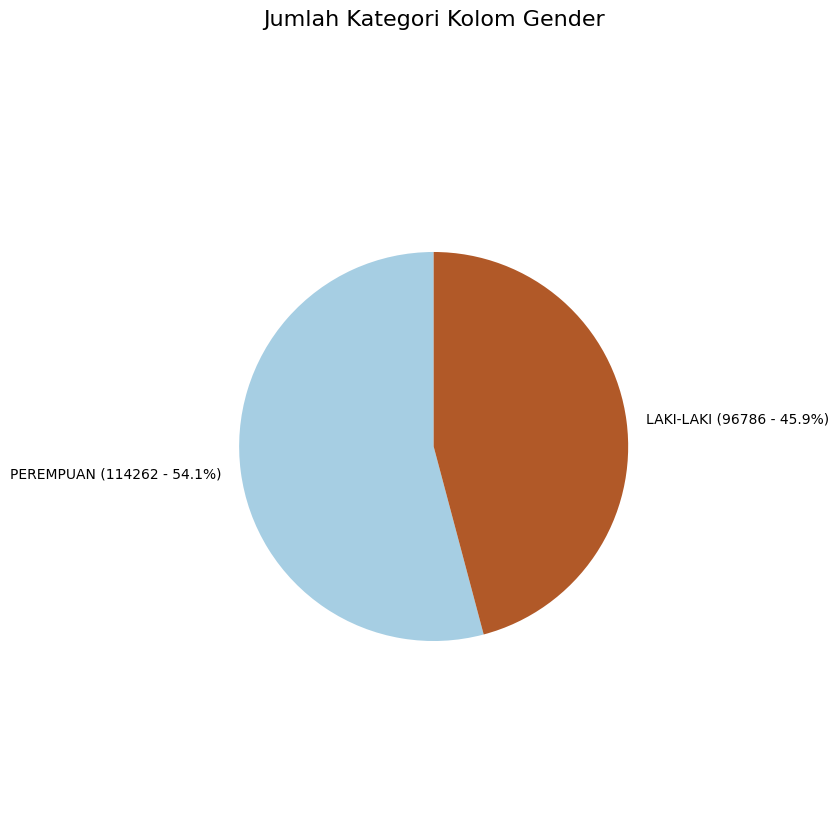


======== Diagram untuk Kolom: Kurang Aktifitas Fisik ========


/tmp/ipython-input-16-2527583000.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', len(category_counts))(np.arange(len(category_counts)))


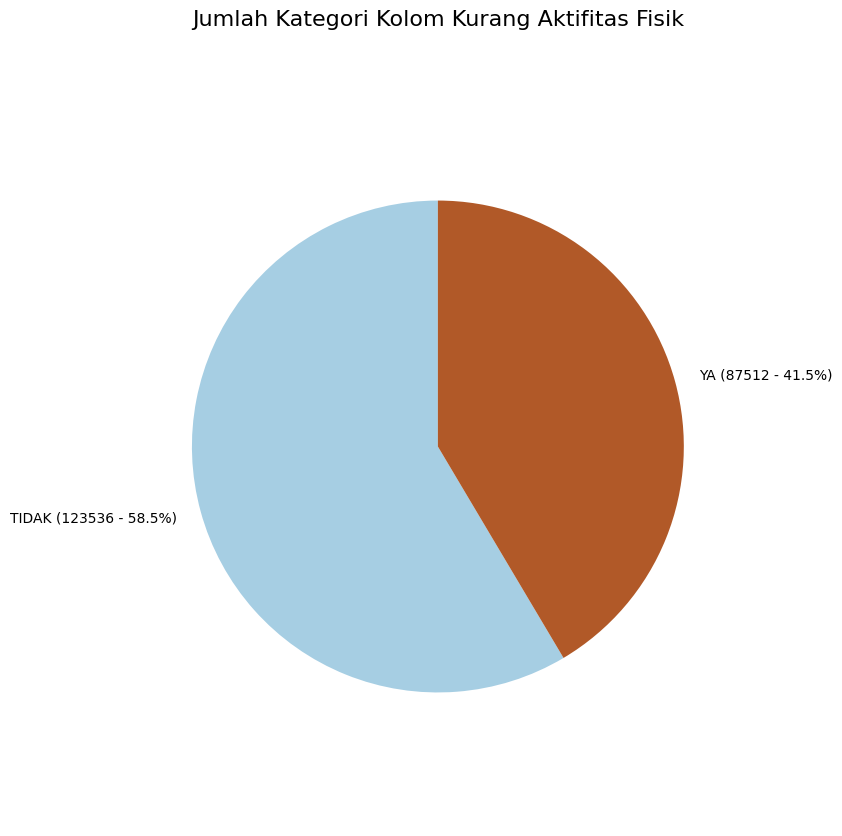


======== Diagram untuk Kolom: Merokok ========


/tmp/ipython-input-16-2527583000.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', len(category_counts))(np.arange(len(category_counts)))


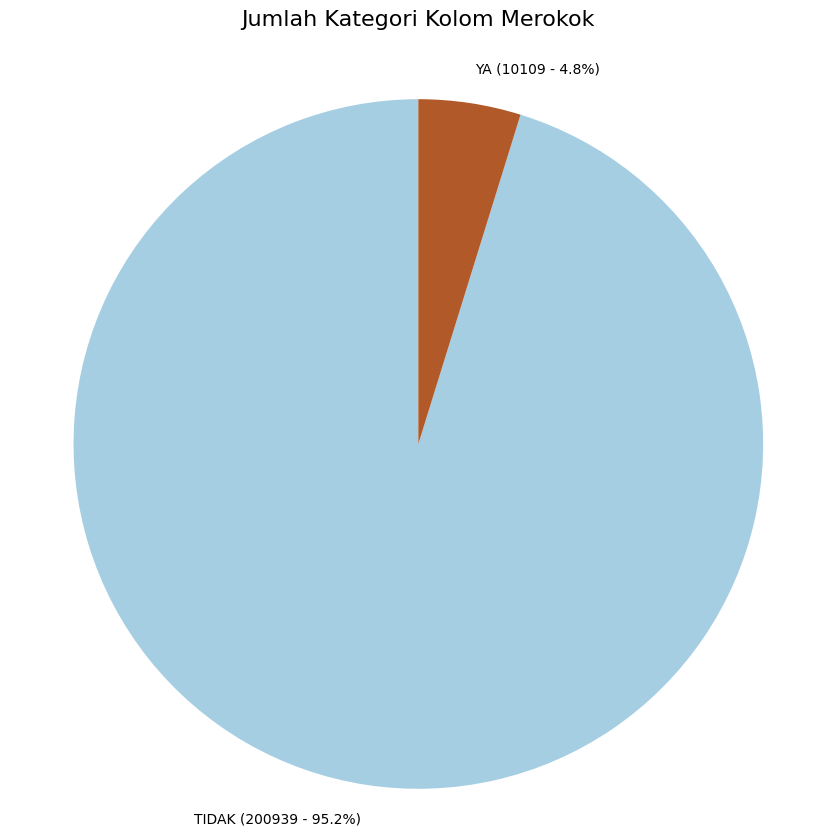

In [16]:
# --- Definisikan Kolom Numerik dan Kategorikal Anda ---
numerical_cols = ['Age', 'Sistol', 'Diastol', 'IMT']
categorical_cols = ['Gender', 'Kurang Aktifitas Fisik', 'Merokok']


# --- 1. Kode untuk Kolom Numerik Menggunakan Histogram (Setiap Diagram Terpisah) ---
print("--- Histogram untuk Kolom Numerik (Setiap Diagram Terpisah) ---")
for col in numerical_cols:
    if col in df.columns:
        print(f"\n======== Diagram untuk Kolom: {col} ========") # Separator tambahan
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True, bins=20, palette='viridis')
        plt.title(f'Distribusi Kolom {col}', fontsize=14, pad=20) # Menambah padding judul
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout(pad=3.0)
        plt.show()
    else:
        print(f"\nKolom numerik '{col}' tidak ditemukan di DataFrame.")


# --- 2. Kode untuk Kolom Kategorikal Menggunakan Diagram Pie (Menampilkan Jumlah & Persentase) ---
print("\n--- Diagram Pie untuk Kolom Kategorikal (Menampilkan Jumlah & Persentase - Setiap Diagram Terpisah) ---")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n======== Diagram untuk Kolom: {col} ========") # Separator tambahan
        category_counts = df[col].value_counts(dropna=False)
        total = category_counts.sum()

        custom_labels = []
        for label, count in category_counts.items():
            if pd.isna(label):
                label_str = 'Tidak Ada Data (NaN)'
            else:
                label_str = str(label)
            custom_labels.append(f'{label_str} ({count} - {count/total:.1%})')

        plt.figure(figsize=(9, 9)) # Ukuran figure sedikit lebih besar untuk ruang ekstra

        colors = plt.cm.get_cmap('Paired', len(category_counts))(np.arange(len(category_counts)))

        plt.pie(category_counts, labels=custom_labels, startangle=90, colors=colors)

        plt.title(f'Jumlah Kategori Kolom {col}', fontsize=16, pad=30) # Meningkatkan padding judul
        plt.axis('equal') # Memastikan lingkaran sempurna
        plt.tight_layout(pad=3.0)
        plt.show()
    else:
        print(f"\nKolom kategorikal '{col}' tidak ditemukan di DataFrame.")

In [17]:
# --- Label encoding untuk kolom kategorikal ---
le = LabelEncoder()
kolom = ['Gender', 'Kurang Aktifitas Fisik', 'Merokok']
for col in kolom:
    df[col] = le.fit_transform(df[col])
df.head()

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok
0,74.0,0,150,80,26.562500,0,0
1,25.0,0,120,74,21.453574,0,0
2,56.0,0,97,75,20.449137,0,0
3,29.0,1,120,80,24.447279,0,0
4,25.0,0,123,85,23.634033,1,0


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)
labels = kmeans.labels_

In [20]:
df.head()

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok,Cluster
0,74.0,0,150,80,26.562500,0,0,0
1,25.0,0,120,74,21.453574,0,0,1
2,56.0,0,97,75,20.449137,0,0,1
3,29.0,1,120,80,24.447279,0,0,1
4,25.0,0,123,85,23.634033,1,0,0


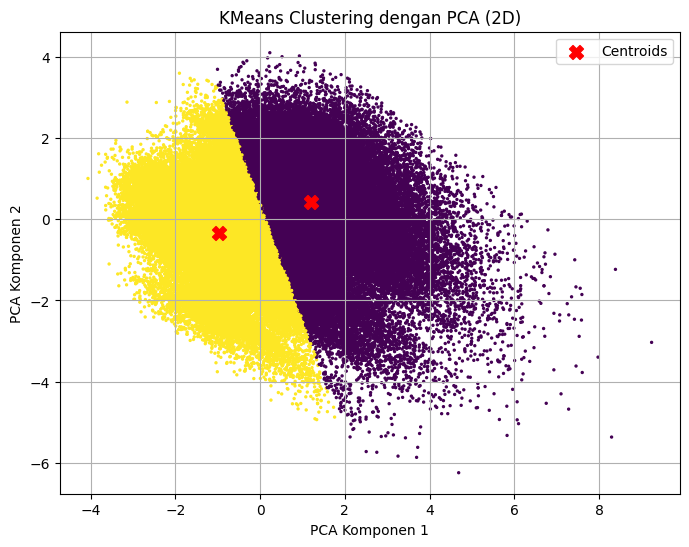

In [21]:
# Visualisasi hasil klaster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=100, label='Centroids')
plt.title("KMeans Clustering dengan PCA (2D)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# --- Pisahkan fitur dan target ---
target_col = 'Cluster'
X = df.drop(target_col, axis=1)
y = df[target_col]

In [23]:
analysis_df = pd.DataFrame({
    'Original_Hipertensi_Status': y,
    'kmeans_cluster_label': labels
})
# Tabel Jumlah
contingency_table = pd.crosstab(analysis_df['kmeans_cluster_label'], analysis_df['Original_Hipertensi_Status'])

# Mengganti nama indeks dan kolom untuk tabel jumlah agar lebih mudah dibaca
contingency_table.index.name = 'Kluster KMeans'
# Asumsikan 0 = 'Tidak Hipertensi' dan 1 = 'Hipertensi'
contingency_table.columns = ['Tidak Hipertensi', 'Hipertensi']
print("="*60)
print("Status Hipertensi di Setiap Kluster (Jumlah Kasus):")
print("="*60)
print(contingency_table)

Status Hipertensi di Setiap Kluster (Jumlah Kasus):
                Tidak Hipertensi  Hipertensi
Kluster KMeans                              
0                          93266           0
1                              0      117782


In [24]:
# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 168838
Jumlah data uji: 42210


In [25]:
X_train

,Age,Gender,Sistol,Diastol,IMT,Kurang Aktifitas Fisik,Merokok
51251,35.0,0,130,80,23.191095,0,0
114390,32.0,1,101,81,30.666667,0,0
188928,26.0,1,115,69,24.776795,1,0
107191,28.0,0,137,86,26.672763,1,0
89919,56.0,1,112,77,28.228979,0,0
...,...,...,...,...,...,...,...
120075,35.0,1,120,70,32.046146,1,0
103880,30.0,1,130,80,26.775934,1,0
132137,22.0,1,111,71,23.309053,0,0
147084,27.0,1,151,99,36.888889,1,0


In [26]:
# --- Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# --- Buat model secara terpisah ---
ada = AdaBoostClassifier()
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
estimators = [('ada', ada), ('knn', knn)]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

In [29]:
ada.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [30]:
y_pred_ada = ada.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_voting = voting_clf.predict(X_test_scaled)

## Evaluasi

In [31]:
print("=============ADA BOOST=============== \n")
print(f"F1 Score: {np.round((f1_score(y_test, y_pred_ada)*100),2)}%")
print(f"Precision: {np.round((precision_score(y_test, y_pred_ada)*100),2)}%")
print(f"Recall: {np.round((recall_score(y_test, y_pred_ada)*100),2)}%")
print(f"Akurasi: {np.round((accuracy_score(y_test, y_pred_ada)*100),2)}% \n")
print('=====================================')

=============ADA BOOST=============== 

F1 Score: 97.22%
Precision: 96.89%
Recall: 97.54%
Akurasi: 96.89% 



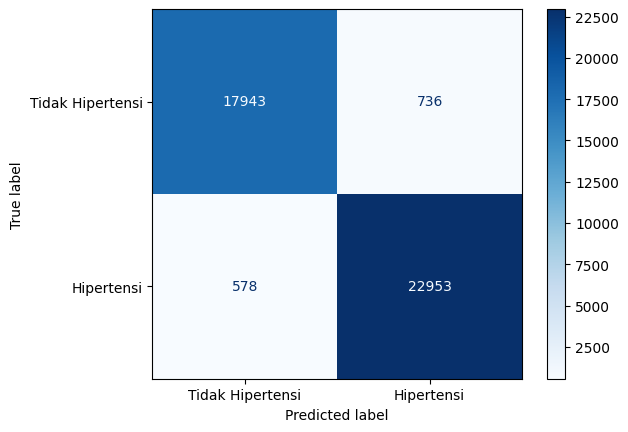

In [32]:

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_ada)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Hipertensi', 'Hipertensi'])
disp.plot(cmap='Blues')


In [33]:
print("==============  KNN  ================ \n")
print(f"F1 Score: {np.round((f1_score(y_test, y_pred_knn)*100),2)}%")
print(f"Precision: {np.round((precision_score(y_test, y_pred_knn)*100),2)}%")
print(f"Recall: {np.round((recall_score(y_test, y_pred_knn)*100),2)}%")
print(f"Akurasi: {np.round((accuracy_score(y_test, y_pred_knn)*100),2)}% \n")
print('=====================================')

==============  KNN  ================ 

F1 Score: 99.08%
Precision: 99.09%
Recall: 99.07%
Akurasi: 98.97% 



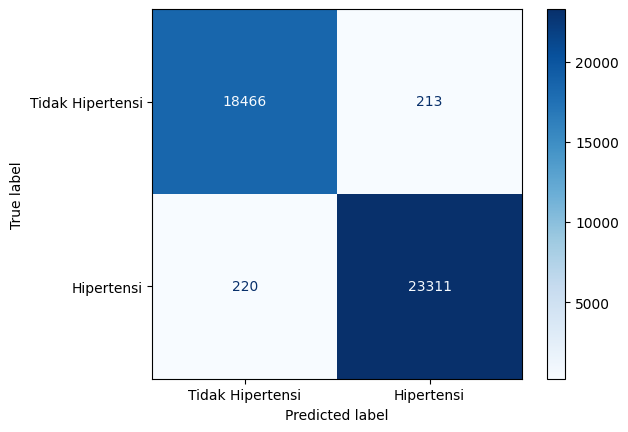

In [34]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Hipertensi', 'Hipertensi'])
disp.plot(cmap='Blues')

In [35]:
print("========  Voting Classifier =========== \n")
print(f"F1 Score: {np.round((f1_score(y_test, y_pred_voting)*100),2)}%")
print(f"Precision: {np.round((precision_score(y_test, y_pred_voting)*100),2)}%")
print(f"Recall: {np.round((recall_score(y_test, y_pred_voting)*100),2)}%")
print(f"Akurasi: {np.round((accuracy_score(y_test, y_pred_voting)*100),2)}% \n")
print('=====================================')

========  Voting Classifier =========== 

F1 Score: 99.09%
Precision: 99.1%
Recall: 99.07%
Akurasi: 98.98% 



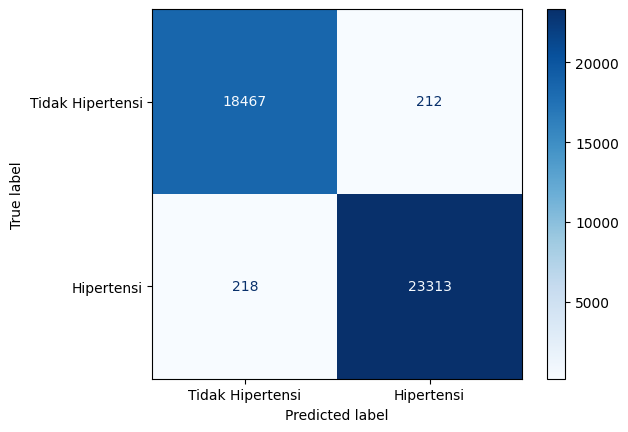

In [36]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Hipertensi', 'Hipertensi'])
disp.plot(cmap='Blues')

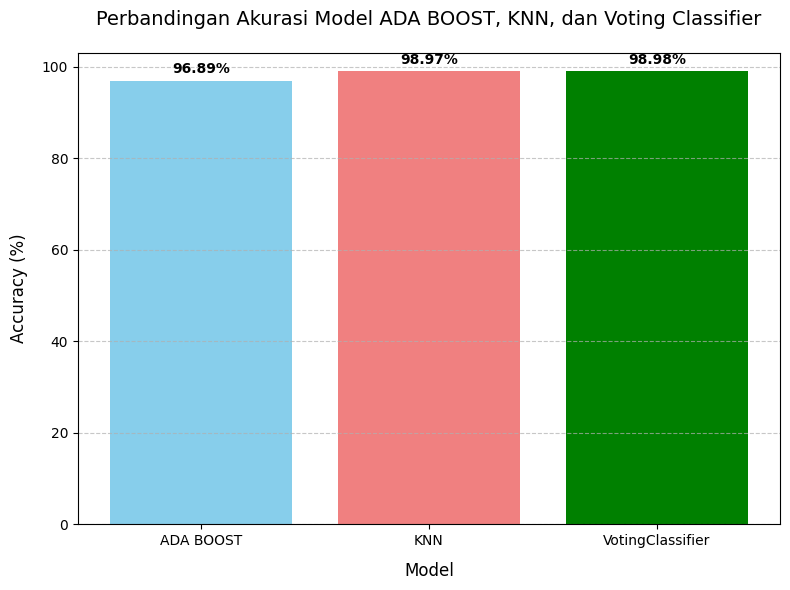

In [37]:
# Menghitung akurasi secara dinamis
akurasi_ada = np.round(accuracy_score(y_test, y_pred_ada) * 100, 2)
akurasi_knn = np.round(accuracy_score(y_test, y_pred_knn) * 100, 2)
akurasi_voting = np.round(accuracy_score(y_test, y_pred_voting) * 100, 2)

# --- Visualisasi Akurasi dalam Diagram Batang (Dinamis) ---
models = ['ADA BOOST', 'KNN','VotingClassifier']
accuracy_scores = [akurasi_ada, akurasi_knn, akurasi_voting] # Sekarang variabel ini dinamis!

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral','green'])

for bar in bars:
    yval = bar.get_height()
    # Posisikan teks di atas batang, dan memastikan ada ruang di atas plot
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.xlabel('Model', fontsize=12, labelpad=10)
plt.ylabel('Accuracy (%)', fontsize=12, labelpad=10)
plt.title('Perbandingan Akurasi Model ADA BOOST, KNN, dan Voting Classifier', fontsize=14, pad=20)

# Pengaturan Sumbu Y
plt.ylim(0, 103) # Batas sumbu Y dari 0 hingga 103 untuk memberi ruang ekstra
plt.yticks(np.arange(0, 101, 20), fontsize=10) # Ticks pada 0, 20, 40, 60, 80, 100
plt.xticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()